In [2]:
! cd cdli; git clone https://github.com/cdli-gh/data

Cloning into 'data'...
remote: Enumerating objects: 7153, done.
remote: Counting objects: 100% (467/467), done.
remote: Compressing objects: 100% (338/338), done.
remote: Total 7153 (delta 138), reused 452 (delta 129), pack-reused 6686
Receiving objects: 100% (7153/7153), 5.90 GiB | 31.87 MiB/s, done.
Resolving deltas: 100% (4106/4106), done.


In [3]:
! cd data; git lfs status

git: 'lfs' is not a git command. See 'git --help'.

Did you mean this?
	log


In [38]:
import pandas as pd
import re

In [12]:
COLS = [
    'id_text',
    'genre',
    'subgenre',
    'period',
    'provenience',
    'id',
    'photo_up'
]

In [9]:
df = pd.read_csv("https://media.githubusercontent.com/media/cdli-gh/data/master/cdli_cat.csv", usecols=COLS)

/tmp/ipykernel_3189/3012391959.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://media.githubusercontent.com/media/cdli-gh/data/master/cdli_cat.csv", usecols=COLS)


In [10]:
df.shape

(353283, 7)

In [17]:
df.sample(5)

,genre,id,id_text,period,photo_up,provenience,subgenre
176918,Administrative,176956,339756,Ur III (ca. 2100-2000 BC),NaN,Umma (mod. Tell Jokha) ?,pisan-dub-ba
229885,Omen,229934,395172,Neo-Assyrian (ca. 911-612 BC),NaN,Nineveh (mod. Kuyunjik),extispicy
324974,Letter,333808,503284,Middle Babylonian (ca. 1400-1100 BC),NaN,Ugarit (mod. Ras Shamra),NaN
48011,Administrative,48012,139664,Ur III (ca. 2100-2000 BC),NaN,Umma (mod. Tell Jokha),NaN
275791,NaN,275841,443458,Middle Hittite (ca. 1500-1100 BC),NaN,Ḫattusa (mod. Boğazkale),NaN


In [18]:
df.to_csv('cdli/data/cdli_cat.csv', index=False)

In [19]:
df = pd.read_csv('cdli/data/cdli_cat.csv', keep_default_na=False, usecols=COLS)

In [20]:
df.shape

(353283, 7)

In [21]:
df = df[df.photo_up.notna()].copy()

In [22]:
df.shape

(353283, 7)

In [23]:
df.head()

,genre,id,id_text,period,photo_up,provenience,subgenre
0,Lexical,1,1,Uruk III (ca. 3200-3000 BC),,Uruk (mod. Warka),Archaic Lu2 A (witness)
1,Lexical,2,2,Uruk III (ca. 3200-3000 BC),,Uruk (mod. Warka),Archaic Lu2 A (witness)
2,Lexical,3,3,Uruk IV (ca. 3350-3200 BC),,Uruk (mod. Warka),Archaic Vocabulary (witness)
3,Lexical,4,4,Uruk IV (ca. 3350-3200 BC),,Uruk (mod. Warka),Archaic Lu2 A (witness)
4,Lexical,5,5,Uruk IV (ca. 3350-3200 BC),,Uruk (mod. Warka),Archaic Lu2 A (witness)


In [42]:
df['period_normed'] = df['period'].str.replace(r'\s+', ' ', regex=True) \
                                  .str.replace(r'\?', '', regex=True) \
                                  .apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))\
                                   .str.strip() 

In [44]:
df = df[df.period_normed != ''].copy()

In [45]:
df.shape

(331173, 9)

In [46]:
df.sample(5)

,genre,id,id_text,period,photo_up,provenience,subgenre,period_normed,era
43473,Administrative,43474,135154,Ur III (ca. 2100-2000 BC),600ppi 20160630,Puzriš-Dagan (mod. Drehem),,Ur III,
208538,Letter,208585,373027,Old Babylonian (ca. 1900-1600 BC),,uncertain (mod. Babylonia),,Old Babylonian,
260319,Royal/Monumental,260368,427722,Neo-Babylonian (ca. 626-539 BC),,,witness,Neo-Babylonian,
252381,,252430,418649,Neo-Assyrian (ca. 911-612 BC),600ppi 20160630,Nineveh (mod. Kuyunjik),,Neo-Assyrian,
83339,Administrative,83340,236064,Early Old Babylonian (ca. 2000-1900 BC),,Isin (mod. Bahriyat) ?,,Early Old Babylonian,


In [47]:
EARLY_BRONZE = {
    'Old Akkadian', 'Ur III',
    'ED IIIb', 'Uruk III',
    'Proto-Elamite', 'Lagash II',
    'Ebla', 'ED IIIa', 'ED I-II',
    'Uruk IV', 'Linear Elamite',
    'Harappan'
    
}
MID_LATE_BRONZE = {
    'Early Old Babylonian',
    'Old Babylonian', 'Old Assyrian',
    'Middle Babylonian', 'Middle Assyrian',
    'Middle Elamite', 'Middle Hittite'
}
IRON = {
    'Neo-Babylonian', 'Neo-Assyrian',
    'Achaemenid', 'Hellenistic',
    'Neo-Elamite'
}

In [48]:
ERA_MAP = {
    **{K: 'early_bronze' for K in EARLY_BRONZE},
    **{K: 'mid_late_bronze' for K in MID_LATE_BRONZE},
    **{K: 'iron' for K in IRON},
}

In [49]:
df['era'] = df.period_normed.map(ERA_MAP).fillna('')

In [50]:
df.sample(10)

,genre,id,id_text,period,photo_up,provenience,subgenre,period_normed,era
45824,Administrative,45825,137467,Ur III (ca. 2100-2000 BC),,Ur (mod. Tell Muqayyar),,Ur III,early_bronze
129623,,129661,283463,Middle Assyrian (ca. 1400-1000 BC),,,,Middle Assyrian,mid_late_bronze
269996,,270046,437658,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,Middle Hittite,mid_late_bronze
229029,,229078,394284,Neo-Assyrian (ca. 911-612 BC),600ppi 20160630,Nineveh (mod. Kuyunjik),,Neo-Assyrian,iron
322400,Literary,331233,500687,Middle Babylonian (ca. 1400-1100 BC),,Nippur (mod. Nuffar),Papnigara,Middle Babylonian,mid_late_bronze
125901,Administrative,125939,279284,Neo-Babylonian (ca. 626-539 BC),600ppi 20160630,Nippur (mod. Nuffar),,Neo-Babylonian,iron
59516,Administrative,59517,206592,Ur III (ca. 2100-2000 BC),,Girsu (mod. Tello),,Ur III,early_bronze
130696,Administrative,130734,285734,Old Babylonian (ca. 1900-1600 BC),,Sippar-Yahrurum (mod. Tell Abu Habbah),tabular account,Old Babylonian,mid_late_bronze
28411,Administrative,28412,119759,Ur III (ca. 2100-2000 BC),600ppi 20160630,Umma (mod. Tell Jokha) ?,,Ur III,early_bronze
329851,Administrative,338685,508177,Old Babylonian (ca. 1900-1600 BC),,Me-Turan (mod. Tell Haddad),,Old Babylonian,mid_late_bronze


In [51]:
df.era.value_counts()

era
early_bronze       150007
mid_late_bronze    115104
iron                63830
                     2232
Name: count, dtype: int64

In [52]:
df.period_normed.nunique()

49

In [53]:
df.period_normed[df.era == ''].nunique()

25

In [54]:
df.period_normed[df.era == ''].value_counts().sort_values()

period_normed
Neo-Babylonian .                     1
1200-700 BC                          1
Uruk III  - Early Dynastic I-II      1
Early Dynastic IIIA                  1
ED IIIb  or Old Babylonian           1
ED IIIa ; Old Babylonian             1
Old Akkadian ; Middle Elamite        1
Old Elamite                          1
copy                                 1
ED IIIb ; Old Akkadian               1
ED IIIb ; Ur III                     1
Middle Babylonian )                  1
Ur III ; Early Old Babylonian        2
modern                               8
Old Akkadian ; Ur III               14
Neo-Babylonian  or Achaemenid       14
ED I-II , Old Babylonian            15
Parthian                            21
Sassanian                           61
fake                               184
Egyptian 0                         186
Pre-Uruk V                         219
Early Neo-Babylonian               231
Uruk V                             418
uncertain                          847
Name: count

/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


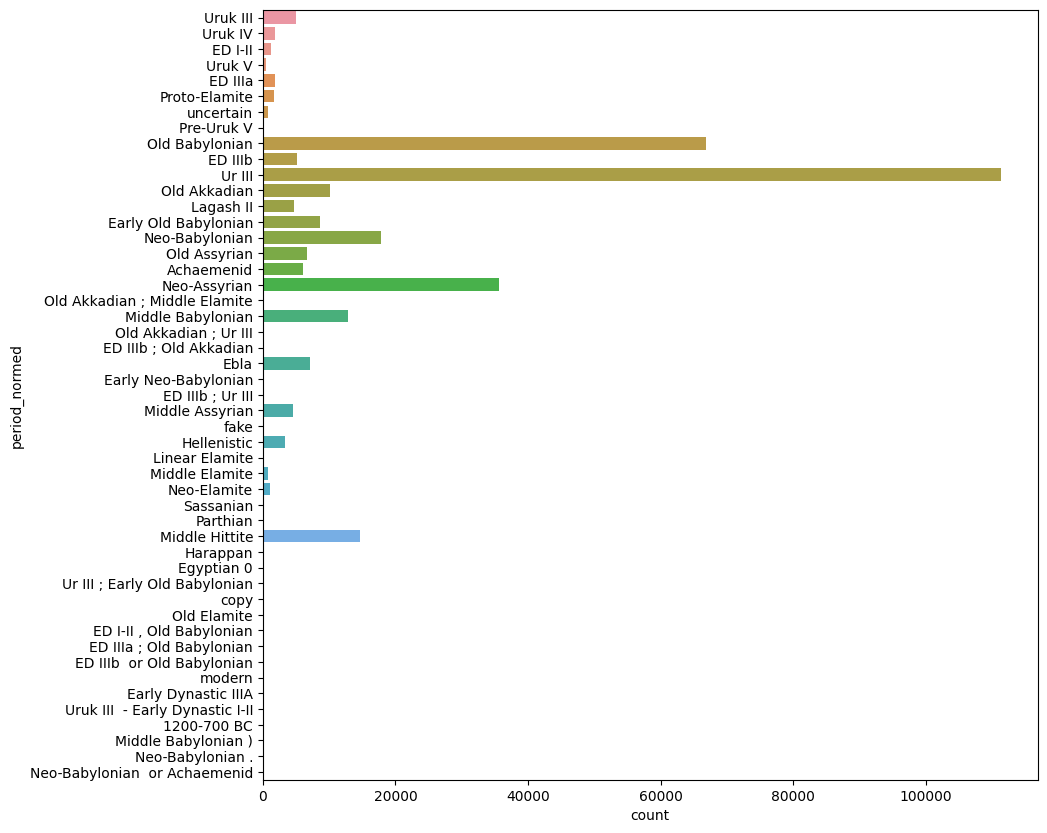

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(y = df.period_normed);

In [64]:
df[df.period_normed != ''].to_csv('output/cdli_catalogue_data_w_provenience.csv', index=False)

In [1]:
df = pd.read_csv("output/cdli_catalogue_data_w_provenience.csv")

/tmp/ipykernel_15462/3017430593.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output/cdli_catalogue_data_w_provenience.csv")


In [3]:
df_orig = pd.read_csv("output/cdli_catalogue_data.csv")

In [4]:
df_orig

,genre,id,id_text,period,photo_up,subgenre,period_normed,era
0,Lexical,661,713,Uruk III (ca. 3200-3000 BC),600ppi 20160630,Archaic Vessels and Garments (witness),Uruk III,early_bronze
1,Lexical,662,714,Uruk III (ca. 3200-3000 BC),600ppi 20160630,Archaic Geography (witness),Uruk III,early_bronze
2,Lexical,663,723,ED I-II (ca. 2900-2700 BC),600ppi 20160630,ED Lu2 A (witness),ED I-II,early_bronze
3,Lexical,664,724,ED I-II (ca. 2900-2700 BC),600ppi 20160913,Archaic Fish (witness),ED I-II,early_bronze
4,Lexical,668,728,ED I-II (ca. 2900-2700 BC),600ppi 20160630,ED Lu2 A (witness),ED I-II,early_bronze
...,...,...,...,...,...,...,...,...
97711,Literary,350226,520348,Old Babylonian (ca. 1900-1600 BC),600ppi 20160913,ETCSL 5.04.05 Dialogue between Two Women B (wi...,Old Babylonian,mid_late_bronze
97712,Literary ?,351577,521702,Early Old Babylonian (ca. 2000-1900 BC),600ppi 20160630,ETCSL 5.04.03 Enkimanšum and Girniisag (witnes...,Early Old Babylonian,mid_late_bronze
97713,Literary,351578,521703,Old Babylonian (ca. 1900-1600 BC),600ppi 20160630,ETCSL 5.03.06 Debate between Copper and Silver...,Old Babylonian,mid_late_bronze
97714,NaN,351692,521818,Middle Assyrian (ca. 1400-1000 BC),600ppi 20160913,NaN,Middle Assyrian,mid_late_bronze


In [5]:
df_merged_w_prov = df_orig.merge(df[['id_text', 'provenience']], how = 'left', on = "id_text")

In [7]:
import re
import unicodedata

def normalize_special_characters(text):
    text = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in text if not unicodedata.combining(c)])

df_merged_w_prov['provenience_normed'] = df_merged_w_prov['provenience'].fillna('unknown').str.replace(r'\s+', ' ', regex=True) \
                                  .str.replace(r'\?', '', regex=True) \
                                  .str.strip() \
                                  .str.replace(r'\s+\)', ')', regex=True) \
                                  .apply(normalize_special_characters)

In [8]:
def extract_relevant_prov(text):
    if text.startswith('uncertain'):
        # Extracts text within parentheses.
        match = re.search(r'\((.*?)\)', text)
        return match.group(1) if match else text
    else:
        # Extracts text outside parentheses.
        return re.sub(r'\s*\(.+?\)', '', text)

df_merged_w_prov['provenience_normed'] = df_merged_w_prov['provenience_normed'].apply(extract_relevant_prov)

In [22]:
pd.set_option('display.max_rows', len(df_merged_w_prov))

df_merged_w_prov['provenience_normed'].value_counts()

provenience_normed
Nineveh                    22519
Nippur                     16883
unknown                    15673
Umma                       10688
Puzris-Dagan                8514
Girsu                       4809
Ur                          2458
Uruk                        1545
Kanesh                      1476
Assur                       1180
Adab                        1092
Garsana                      954
Gasur/Nuzi                   892
Susa                         871
Sippar-Yahrurum              719
Larsa                        703
Nerebtum                     697
mod. Babylonia               675
Parsa                        627
Kish                         580
Kalhu                        492
Tuttul                       375
Suruppak                     363
Babili                       274
Ebla                         243
mod. Beydar                  214
Akhetaten                    198
Esnunna                      155
Borsippa                     148
Kar-Tukulti-Ninurta     

In [19]:
df_merged_w_prov.loc[df_merged_w_prov['provenience_normed']=="mod. uncertain","provenience_normed"]="unknown"

In [21]:
df_merged_w_prov.to_csv("output/cdli_catalogue_data.csv", index = False)